In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Documents/insurance.csv')

In [3]:
df.head() #primeiras 5 linhas do dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape #formato do dataset

(1338, 7)

In [5]:
# valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
y = df.iloc[:, -1:] #pegar só a coluna "charges"
x = df.iloc[:, :-1] #todas colunas menos y

In [8]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [9]:
df['sex'] = pd.get_dummies(x['sex'])
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [10]:
smoke = df['smoker'].map({'yes': 1, 'no': 0})
df['smoker'] = smoke

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
one_hot = pd.get_dummies(x['region'])
df = df.drop(columns=['region'])
df = df.join(one_hot)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


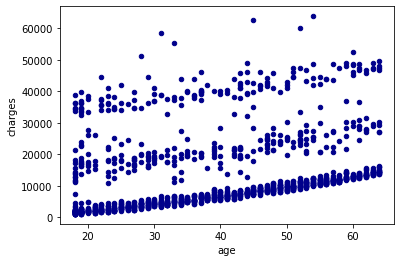

In [50]:
ax1 = df.plot.scatter(x='age',
                      y='charges',
                      c='DarkBlue')

In [14]:
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [31]:
#split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest'] ]
#X_train = X_train.values.reshape(-1, 1)
y_train = df_train['charges']

X_test = df_test[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest' ]]
#X_test = X_test.values.reshape(-1, 1)
y_test = df_test['charges']

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [43]:
scores = cross_val_score(lm, X_train, y_train, scoring='explained_variance', cv=10)
print("Accuracy of Model with Cross Validation - explained_variance is:",scores.mean() * 100)

Accuracy of Model with Cross Validation - explained_variance is: 71.89789859073808


In [42]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print("Accuracy of Model with Cross Validation - r2 is:",scores.mean() * 100)

Accuracy of Model with Cross Validation - r2 is: 71.28736251279729


In [45]:
scores = cross_val_score(lm, X_train, y_train, scoring='max_error', cv=10)
print("Accuracy of Model with Cross Validation - max_error is:",scores.mean() * 100)

Accuracy of Model with Cross Validation - max_error is: -2284606.3024718594


Referências: 

https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression
